# Chapter 9 - Problem 4

Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

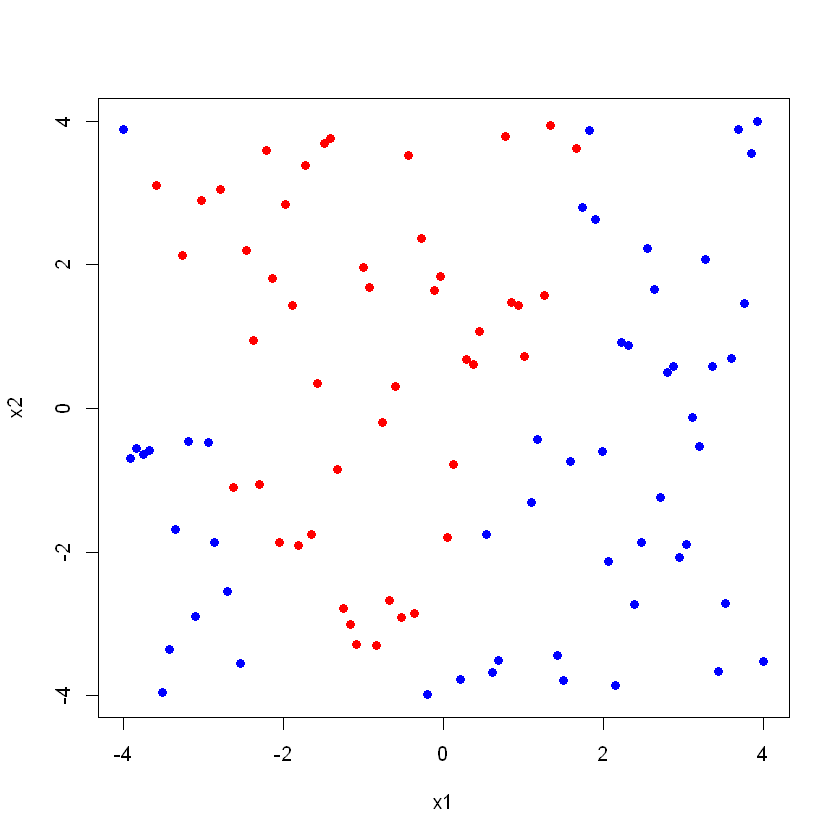

In [21]:
set.seed(1001)
x1 <- seq(from = -4, to = 4, length = 100)
x2 <- runif(100, min = -4, max = 4)

y <- rep("blue",100)
y[x2 > x1^2 + 2*x1-3] = "red"
plot(x1, x2 , col = y, pch = 19)

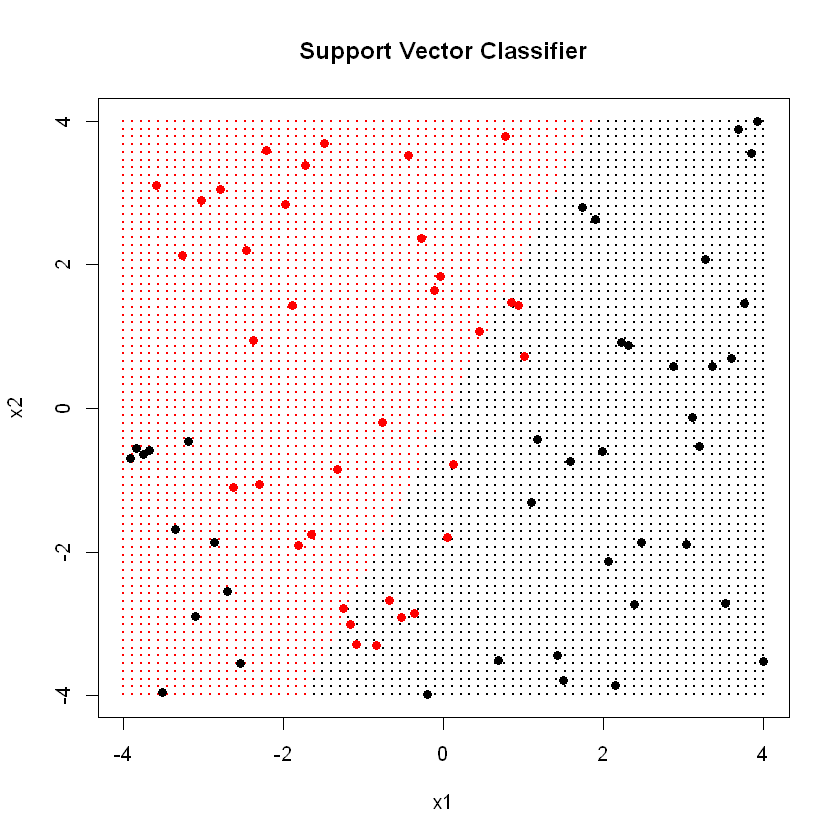

In [54]:
library(e1071)
dat <- data.frame(x1, x2, y = as.factor(y))
trainset <- sample(seq(1,100),75)
train.dat <- dat[trainset,]
test.dat <- dat[-trainset,]

svmradial <- svm(y~.,data = train.dat, kernel = "radial", cost = 5)
svmpoly <- svm(y~.,data = train.dat, kernel = "polynomial", cost = 1,degree = 2)
svmlineal <- svm(y~.,data = train.dat, kernel = "linear", cost = 5)

make.grid <- function (x, n = 75) {
    grange <- apply(x,2,range) #Range of each x value
    x1 <- seq(from = grange[1,1],to = grange[2,1], length = n)
    x2 <- seq(from = grange[1,2],to = grange[2,2], length = n)
    return(expand.grid(x1 = x1, x2 = x2)) #lattice function
}

x <- matrix(c(x1,x2),100,2)
xgrid <- make.grid(x)
ygrid.lineal <- predict(svmlineal,xgrid)
plot(xgrid,col = as.numeric(ygrid.lineal),cex = 0.2, pch = 20, main = "Support Vector Classifier")
points(train.dat$x1, train.dat$x2 , col = train.dat$y, pch = 19)

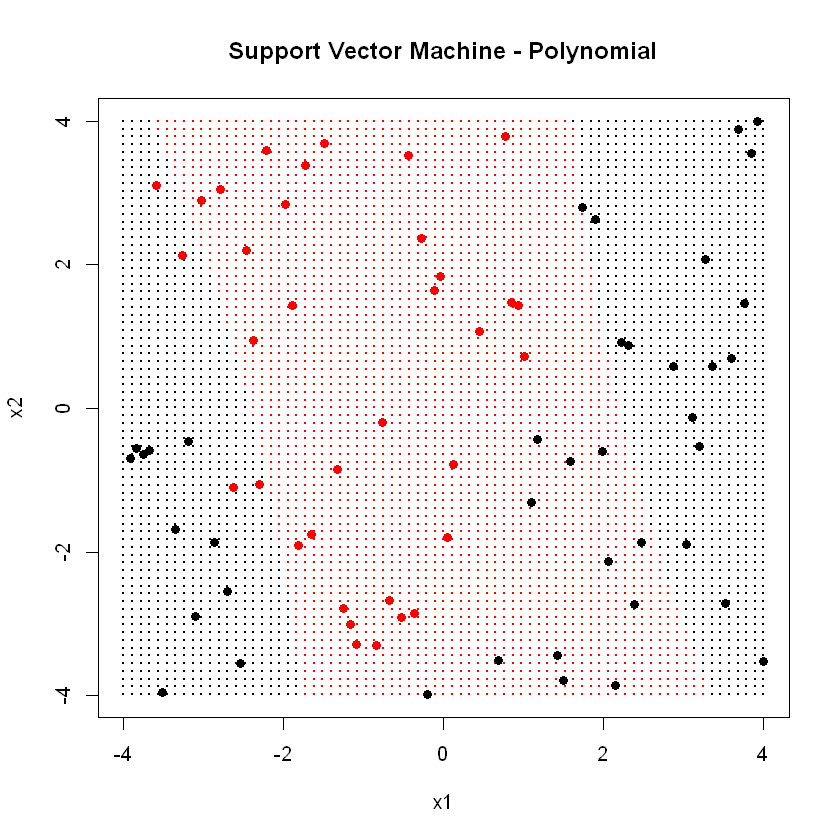

In [56]:
ygrid.poly <- predict(svmpoly,xgrid)
plot(xgrid,col = as.numeric(ygrid.poly),cex = 0.2, pch = 20, 
     main = "Support Vector Machine - Polynomial")
points(train.dat$x1, train.dat$x2 , col = train.dat$y, pch = 19)

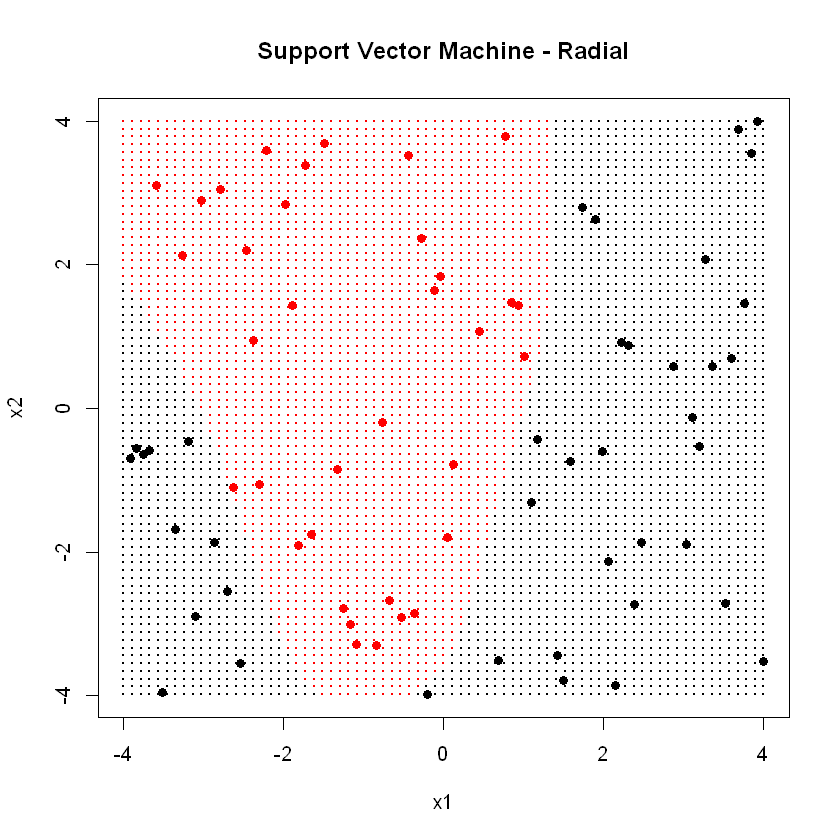

In [57]:
ygrid.radial <- predict(svmradial,xgrid)
plot(xgrid,col = as.numeric(ygrid.radial),cex = 0.2, pch = 20,
    main = "Support Vector Machine - Radial")
points(train.dat$x1, train.dat$x2 , col = train.dat$y, pch = 19)

In [64]:
train.x <- train.dat[,1:2]
train.class.lineal <- predict(svmlineal,train.x)
with(train.dat,table(y,train.class.lineal))

      train.class.lineal
y      blue red
  blue   29  11
  red    11  24

Training misclassification error is 30% for the support vector classifier 

In [66]:
train.class.poly <- predict(svmpoly,train.x)
with(train.dat,table(y,train.class.poly))

      train.class.poly
y      blue red
  blue   28  12
  red     4  31

Training misclassification error is 21% for the support vector machine with polynomial kernel

In [69]:
train.class.radial <- predict(svmradial,train.x)
with(train.dat,table(y,train.class.radial))

      train.class.radial
y      blue red
  blue   40   0
  red     0  35

Training misclassification error is 0% for the support vector machine with radial kernel

In [71]:
test.x <- test.dat[,1:2]
test.class.lineal <- predict(svmlineal,test.x)
with(test.dat,table(y,test.class.lineal))

      test.class.lineal
y      blue red
  blue   10   3
  red     2  10

In [72]:
Test misclassification error is 20% for the support vector classifier 

[1] 0.2

In [73]:
test.class.poly <- predict(svmpoly,test.x)
with(test.dat,table(y,test.class.poly))

      test.class.poly
y      blue red
  blue   10   3
  red     2  10

Training misclassification error is 20% for the support vector machine with polynomial kernel

In [75]:
test.class.radial <- predict(svmradial,test.x)
with(test.dat,table(y,test.class.radial))

      test.class.radial
y      blue red
  blue   11   2
  red     2  10

In [76]:
Training misclassification error is 16% for the support vector machine with radial kernel

[1] 0.16

As observed from the plot and the test error for each of the methods, the best model that approximates better the nonlinear boundary is the support vector machine with a radial kernel.